<a href="https://colab.research.google.com/github/DDricko/Ciencia_de_dados_Ebac/blob/main/Mod9Tarefa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_raw['faixa_lat'] = np.where(
    sinasc_raw['munResLat'] < -10.5,
    'Abaixo -10.5',
    'Acima -10.5'
)

In [5]:
agr_lat = (
    sinasc_raw
    .groupby('faixa_lat')[['APGAR1', 'APGAR5']]
    .agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
)

agr_lat

APGAR1                                                  \
                   sum      mean  min   max median       std       var   
faixa_lat                                                                
Abaixo -10.5  104590.0  8.070216  0.0  10.0    8.0  0.960767  0.923073   
Acima -10.5   114568.0  8.199828  0.0  10.0    8.0  1.002826  1.005660   

                APGAR5                                                  
                   sum      mean  min   max median       std       var  
faixa_lat                                                               
Abaixo -10.5  118393.0  9.138788  0.0  10.0    9.0  0.805381  0.648638  
Acima -10.5   128756.0  9.216607  0.0  10.0    9.0  0.774742  0.600225

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_raw['faixa_area'] = np.where(
    sinasc_raw['munResArea'] <= 3000,
    'Até 3000',
    'Acima de 3000'
)

In [7]:
agr_area = (
    sinasc_raw
    .groupby('faixa_area')[['IDADEMAE', 'IDADEPAI']]
    .agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
)

agr_area

IDADEMAE                                                 \
                   sum       mean min max median       std        var   
faixa_area                                                              
Acima de 3000   567872  26.038425  12  53   25.0  6.405365  41.028696   
Até 3000        137389  26.324775  11  53   26.0  6.305535  39.759775   

               IDADEPAI                                                     
                    sum       mean   min   max median       std        var  
faixa_area                                                                  
Acima de 3000  158446.0  31.092229  15.0  86.0   30.0  7.818634  61.131041  
Até 3000        78074.0  31.092792  16.0  69.0   30.0  7.675474  58.912900

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
sinasc_raw['faixa_altitude'] = pd.cut(
    sinasc_raw['munResAlt'],
    bins=3,
    labels=['Baixa', 'Média', 'Alta']
)

In [9]:
agr_alt = (
    sinasc_raw
    .groupby('faixa_altitude')[['QTDFILVIVO', 'QTDFILMORT']]
    .agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
)

agr_alt

/tmp/ipython-input-3841284385.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('faixa_altitude')[['QTDFILVIVO', 'QTDFILMORT']]


QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
faixa_altitude                                                              
Baixa             23055.0  1.065388  0.0  14.0    1.0  1.172502  1.374762   
Média              2317.0  1.039013  0.0  30.0    1.0  1.246189  1.552986   
Alta               1454.0  0.917929  0.0  10.0    1.0  1.021973  1.044429   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
faixa_altitude                                                             
Baixa              5763.0  0.272805  0.0   9.0    0.0  0.599928  0.359914  
Média               482.0  0.216922  0.0   3.0    0.0  0.509011  0.259092  
Alta                398.0  0.251580  0.0  28.0    0.0  0.874790  0.765257

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [13]:
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

In [14]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['mes'] = sinasc_raw['DTNASC'].dt.month

In [15]:
idade_media = (
    sinasc_raw
    .groupby(['mes', 'regiao_imediata'])['IDADEMAE']
    .mean()
    .reset_index()
)

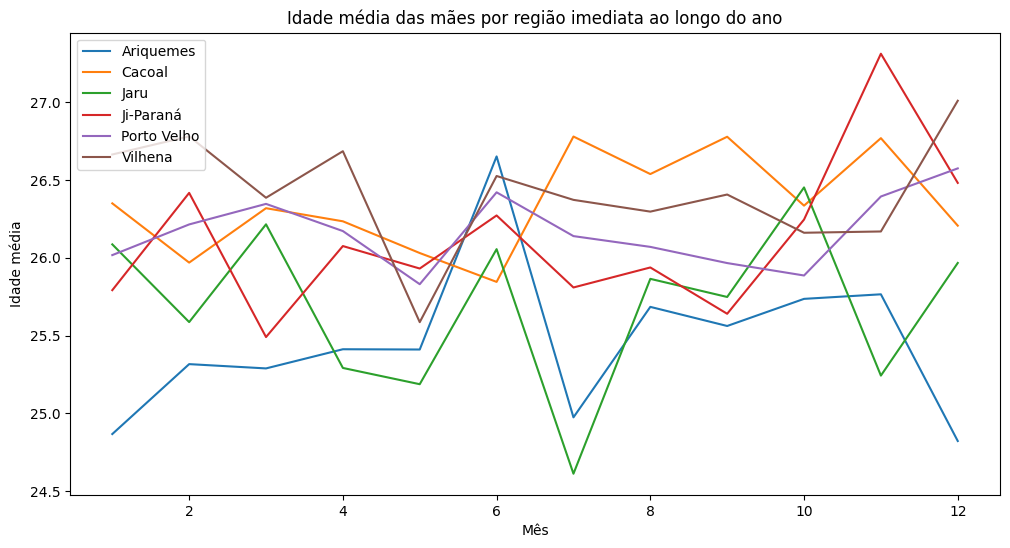

In [16]:
plt.figure(figsize=(12,6))

for regiao in idade_media['regiao_imediata'].dropna().unique():
    dados = idade_media[idade_media['regiao_imediata'] == regiao]
    plt.plot(dados['mes'], dados['IDADEMAE'], label=regiao)

plt.title('Idade média das mães por região imediata ao longo do ano')
plt.xlabel('Mês')
plt.ylabel('Idade média')
plt.legend()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [20]:
idh_map = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras': 0.692,
    'Jaru': 0.689,
    'Colorado do Oeste': 0.685,
    'Ouro Preto do Oeste': 0.682,
    'Espigão d\'Oeste': 0.672,
    'Santa Luzia d\'Oeste': 0.670,
    'Pimenteiras do Oeste': 0.665
}

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [21]:
ifdm_map = {
    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
    'Pimenta Bueno': 0.7383,
    'Porto Velho': 0.7257,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111
}

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

In [22]:
pib_map = {
    'Porto Velho': 16600000000,    # R$ 16.6 bi (maior PIB)
    'Ji-Paraná': 3300000000,       # R$ 3.3 bi
    'Vilhena': 2700000000,         # R$ 2.7 bi
    'Ariquemes': 2400000000,       # R$ 2.4 bi
    'Cacoal': 2100000000,          # R$ 2.1 bi
    'Primavera de Rondônia': 60000000,
    'Teixeirópolis': 89000000,
    'São Felipe d\'Oeste': 89000000,
    'Pimenteiras do Oeste': 104000000,
    'Rio Crespo': 106000000
}

In [23]:
sinasc_raw['idh'] = sinasc_raw['munResNome'].map(idh_map)
sinasc_raw['ifdm'] = sinasc_raw['munResNome'].map(ifdm_map)
sinasc_raw['pib'] = sinasc_raw['munResNome'].map(pib_map)

In [24]:
sinasc_raw['faixa_idh'] = pd.cut(
    sinasc_raw['idh'],
    bins=[0, 0.6, 0.7, 0.8, 1.0],
    labels=['Muito baixo', 'Baixo', 'Médio', 'Alto']
)

In [25]:
sinasc_raw['faixa_ifdm'] = pd.cut(
    sinasc_raw['ifdm'],
    bins=[0, 0.6, 0.7, 0.8, 1.0],
    labels=['Regular', 'Moderado', 'Moderado alto', 'Alto']
)

In [26]:
sinasc_raw['faixa_pib'] = pd.cut(
    sinasc_raw['pib'],
    bins=[0, 100e6, 1000e6, 3000e6, 20000e6],
    labels=['Muito baixo', 'Baixo', 'Médio', 'Alto']
)

In [27]:
agr_idh = (
    sinasc_raw
    .groupby('faixa_idh')[['IDADEMAE', 'PESO', 'APGAR5']]
    .agg(['sum','mean','min','max','median','std','var'])
)

agr_idh

/tmp/ipython-input-794980170.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('faixa_idh')[['IDADEMAE', 'PESO', 'APGAR5']]


IDADEMAE                                                     \
                 sum       mean   min   max median       std        var   
faixa_idh                                                                 
Muito baixo        0        NaN   NaN   NaN    NaN       NaN        NaN   
Baixo          77559  26.470648  12.0  53.0   26.0  6.411569  41.108220   
Médio         418296  26.261678  12.0  47.0   26.0  6.415538  41.159121   
Alto               0        NaN   NaN   NaN    NaN       NaN        NaN   

                 PESO                      ...                      \
                  sum         mean    min  ...  median         std   
faixa_idh                                  ...                       
Muito baixo         0          NaN    NaN  ...     NaN         NaN   
Baixo         9488039  3238.238567  258.0  ...  3260.0  531.597753   
Médio        51716855  3246.914553  292.0  ...  3275.0  554.013292   
Alto                0          NaN    NaN  ...     NaN         NaN   

                              APGAR5                                        \
                       var       sum      mean  min   max median       std   
faixa_idh                                                                    
Muito baixo            NaN       0.0       NaN  NaN   NaN    NaN       NaN   
Baixo        282596.171472   26689.0  9.124444  0.0  10.0    9.0  0.754535   
Médio        306930.728242  145605.0  9.176015  0.0  10.0    9.0  0.757201   
Alto                   NaN       0.0       NaN  NaN   NaN    NaN       NaN   

                       
                  var  
faixa_idh              
Muito baixo       NaN  
Baixo        0.569324  
Médio        0.573353  
Alto              NaN  

[4 rows x 21 columns]

In [28]:
agr_ifdm = (
    sinasc_raw
    .groupby('faixa_ifdm')[['IDADEPAI', 'APGAR1', 'QTDFILVIVO']]
    .agg(['sum','mean','min','max','median','std','var'])
)

agr_ifdm

/tmp/ipython-input-2850493641.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('faixa_ifdm')[['IDADEPAI', 'APGAR1', 'QTDFILVIVO']]


IDADEPAI                                                     \
                    sum       mean   min   max median       std        var   
faixa_ifdm                                                                   
Regular             0.0        NaN   NaN   NaN    NaN       NaN        NaN   
Moderado            0.0        NaN   NaN   NaN    NaN       NaN        NaN   
Moderado alto  114731.0  31.236319  15.0  70.0   30.0  7.796585  60.786731   
Alto                0.0        NaN   NaN   NaN    NaN       NaN        NaN   

                 APGAR1                 ...                            \
                    sum      mean  min  ... median      std       var   
faixa_ifdm                              ...                             
Regular             0.0       NaN  NaN  ...    NaN      NaN       NaN   
Moderado            0.0       NaN  NaN  ...    NaN      NaN       NaN   
Moderado alto  129774.0  8.177316  0.0  ...    8.0  0.96053  0.922619   
Alto                0.0       NaN  NaN  ...    NaN      NaN       NaN   

              QTDFILVIVO                                                 
                     sum     mean  min   max median       std       var  
faixa_ifdm                                                               
Regular              0.0      NaN  NaN   NaN    NaN       NaN       NaN  
Moderado             0.0      NaN  NaN   NaN    NaN       NaN       NaN  
Moderado alto    15439.0  1.04487  0.0  12.0    1.0  1.139931  1.299442  
Alto                 0.0      NaN  NaN   NaN    NaN       NaN       NaN  

[4 rows x 21 columns]

In [29]:
agr_pib = (
    sinasc_raw
    .groupby('faixa_pib')[['IDADEMAE', 'IDADEPAI', 'PESO']]
    .agg(['sum','mean','min','max','median','std','var'])
)

agr_pib

/tmp/ipython-input-1394056374.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('faixa_pib')[['IDADEMAE', 'IDADEPAI', 'PESO']]


IDADEMAE                                                IDADEPAI  \
                 sum       mean min max median       std        var      sum   
faixa_pib                                                                      
Muito baixo     2828  26.429907  16  39   26.0  5.764419  33.228531   2534.0   
Baixo           2336  25.955556  14  40   26.0  6.216887  38.649688    206.0   
Médio         123253  26.263158  13  47   26.0  6.284631  39.496590  45329.0   
Alto          279520  26.322629  12  47   26.0  6.482664  42.024927  53994.0   

                              ...                                  PESO  \
                  mean   min  ... median       std        var       sum   
faixa_pib                     ...                                         
Muito baixo  31.675000  20.0  ...   30.0  7.252717  52.601899    340836   
Baixo        34.333333  25.0  ...   35.0  7.174027  51.466667    293752   
Médio        31.326192  17.0  ...   30.0  7.754891  60.138338  15222820   
Alto         31.612412  15.0  ...   31.0  7.762188  60.251562  34457890   

                                                                        
                    mean  min   max  median         std            var  
faixa_pib                                                               
Muito baixo  3185.383178  320  4435  3210.0  599.899247  359879.106507  
Baixo        3263.911111  990  4505  3317.5  581.530114  338177.272909  
Médio        3243.728958  315  5470  3270.0  523.230425  273770.077842  
Alto         3244.927959  292  5480  3275.0  569.669133  324522.920879  

[4 rows x 21 columns]

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Municípios com maior desenvolvimento socioeconômico (IDH e IFDM mais altos) e maior PIB tendem a apresentar maior idade média das mães e melhores indicadores ao nascer (como APGAR e peso médio).

Isso sugere que melhores condições econômicas e sociais estão associadas a melhores condições materno-infantis.